# APLICACIÓN CON KERAS Y TENSORFLOW


Importaciones

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # Aplicar el estilo 'ggplot'

import numpy as np
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split #para separar train de validacion

from sklearn.metrics import r2_score

Generador datos continuos

In [2]:
'''Generador de datos continuos'''

def generar_datos_regresion(cantidad_ejemplos):
    # Generar datos de ejemplo
    n = cantidad_ejemplos
    x1 = np.random.uniform(0, 10, n)
    x2 = np.random.uniform(0, 10, n)
    x = np.c_[x1, x2]
    t = funcion_salida(x1, x2) 
    
    #La shape de t es (500,)
    # Agrego una nueva dimensión a t. Esto es para que coincida con la dimensión de y, que es (500,1)
    t = np.reshape(t, (cantidad_ejemplos,1))

    return x, t

def funcion_salida(x1, x2):
    # Definir una función para la relación entre x1, x2 y y
    t = np.sin(x1) + np.cos(x2)
    return t

# Ejecucion


Genero el conjunto de datos

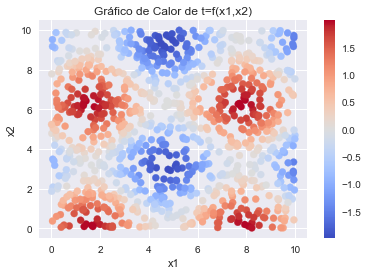

In [3]:
x, t =  generar_datos_regresion(1000)

# Crear el gráfico de calor
plt.scatter(x[:,0], x[:,1], c=t, cmap='coolwarm')
plt.colorbar()

# Personalizar el gráfico
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gráfico de Calor de t=f(x1,x2)')

# Mostrar el gráfico
plt.show()

Defino la arquitectura del modelo de red neuronal

In [4]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(2,), activation='relu'),  # Capa oculta con 100 neuronas
    keras.layers.Dense(1)  # Capa de salida con 1 unidad
])

Compilar el modelo. Especifica la función de pérdida y el optimizador a utilizar durante el entrenamiento:

In [5]:
model.compile(loss='mean_squared_error', optimizer='adam')

Separo conjunto de train de test con proporcion 90-10

In [6]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.1)

Entreno usando método fit()

In [7]:
model.fit(x_train, t_train, epochs=100, batch_size=1)

Epoch 1/100
900/900 [==============================] - 1s 534us/step - loss: 1.0069
Epoch 2/100
900/900 [==============================] - 0s 496us/step - loss: 0.8919
Epoch 3/100
900/900 [==============================] - 0s 486us/step - loss: 0.8472
Epoch 4/100
900/900 [==============================] - 0s 514us/step - loss: 0.8232
Epoch 5/100
900/900 [==============================] - 0s 523us/step - loss: 0.7855
Epoch 6/100
900/900 [==============================] - 0s 491us/step - loss: 0.7656
Epoch 7/100
900/900 [==============================] - 0s 485us/step - loss: 0.7213
Epoch 8/100
900/900 [==============================] - 0s 485us/step - loss: 0.7089
Epoch 9/100
900/900 [==============================] - 0s 483us/step - loss: 0.6658
Epoch 10/100
900/900 [==============================] - 0s 491us/step - loss: 0.6463
Epoch 11/100
900/900 [==============================] - 0s 495us/step - loss: 0.6029
Epoch 12/100
900/900 [==============================] - 0s 492us/step - lo

Verificamos modelo en conjunto de train

In [8]:
y = model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


Grafica de ajuste y métrica r^2 para conjunto test

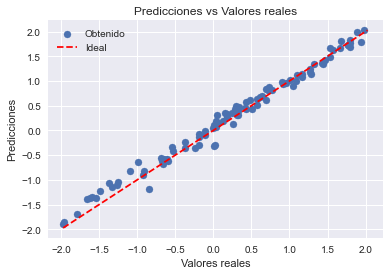

R^2 para conjunto test: 0.982


In [9]:
# Generar valores de prueba para la línea diagonal
min_val = min(np.min(t_test), np.min(y))
max_val = max(np.max(t_test), np.max(y))
diag_line = np.linspace(min_val, max_val, 100)

# Graficar las predicciones vs los valores reales
plt.scatter(t_test, y)
plt.plot(diag_line, diag_line, color='red', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')

# Mostrar leyenda
plt.legend(['Obtenido', 'Ideal'])

# Mostrar el gráfico
plt.show()

r2= r2_score(t_test, y)

print(f"R^2 para conjunto test: {r2:0.3f}")